## Analyse exploratoire et nettoyage de `name.basics`

### Introduction
Les étapes suivantes visent à analyser, nettoyer et préparer la table `name.basics` pour une utilisation ultérieure. 
Nous allons examiner chaque colonne, effectuer les transformations nécessaires et proposer des recommandations pour les prochaines étapes.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Étape 1 : Chargement des données

In [ ]:
# Importation du DataSet :
df_name_basics = pd.read_csv('../gitignore/name.basics.tsv', sep= '\t')

- #### Aperçu rapide des données

In [3]:
df_name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13958409 entries, 0 to 13958408
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   nconst             object
 1   primaryName        object
 2   birthYear          object
 3   deathYear          object
 4   primaryProfession  object
 5   knownForTitles     object
dtypes: object(6)
memory usage: 639.0+ MB


### Étape 2 : Informations générales sur les données

- #### Aperçu rapide des données

In [4]:
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


- #### Identification des valeurs manquantes

In [5]:
df_name_basics.isna().sum()

nconst               0
primaryName          9
birthYear            0
deathYear            0
primaryProfession    0
knownForTitles       0
dtype: int64

In [6]:
manquant_primary_name = df_name_basics[df_name_basics['primaryName'].isna()]

print("Lignes avec des valeurs manquantes dans `primaryName` :")
print(manquant_primary_name)

# Vérification du nombre total de valeurs manquantes
print(f"Nombre total de valeurs manquantes : {manquant_primary_name.shape[0]}")

Lignes avec des valeurs manquantes dans `primaryName` :
             nconst primaryName birthYear deathYear        primaryProfession  \
100967    nm0106021         NaN        \N        \N                    actor   
1786541  nm10927938         NaN        \N        \N  art_department,composer   
4927108  nm14292439         NaN        \N        \N                       \N   
4962416  nm14334668         NaN        \N        \N                 director   
4993716  nm14381073         NaN        \N        \N          director,writer   
5877414  nm15383643         NaN        \N        \N                 composer   
6311127  nm15901107         NaN        \N        \N                    actor   
7029620  nm16712594         NaN        \N        \N           actor,composer   
8387433   nm3177777         NaN        \N        \N                  actress   

                knownForTitles  
100967              tt21610866  
1786541  tt16401648,tt10837972  
4927108                     \N  
4962416    

- #### Remplacement des valeurs '\N' par NaN pour faciliter le traitement

In [7]:
df_name_basics = df_name_basics.replace(r'\\N', pd.NA, regex=True)

In [8]:
df_name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934,<NA>,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949,1982,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0069467,tt0050976,tt0083922"


In [ ]:
# Vérifier s'il existe des doublons dans la colonne 'nconst'
doublons = df_name_basics['nconst'].duplicated().sum()

if doublons > 0:
    print(f"Il y a {doublons} doublons dans la colonne 'nconst'.")
else:
    print("Toutes les valeurs de la colonne 'nconst' sont uniques.")

Toutes les valeurs de la colonne 'nconst' sont uniques.


- #### Conversion des colonnes `birthYear` et `deathYear`

In [ ]:
# Conversion des colonnes en types numériques pour analyse
df_name_basics['birthYear'] = pd.to_numeric(df_name_basics['birthYear'], errors='coerce')
df_name_basics['deathYear'] = pd.to_numeric(df_name_basics['deathYear'], errors='coerce')
df_name_basics['birthYear'] = df_name_basics['birthYear'].fillna(0).astype(int).replace(0, pd.NA)
df_name_basics['deathYear'] = df_name_basics['deathYear'].fillna(0).astype(int).replace(0, pd.NA)

### Étape 3 : Nettoyage de la colonne `primaryProfession` et `knownForTitles`

In [ ]:
# Conversion des professions en liste
df_name_basics['primaryProfession'] = df_name_basics['primaryProfession'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)

# Explosion des professions
df_exploded_profession = df_name_basics.explode('primaryProfession', ignore_index=True)

In [15]:
df_exploded_profession.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,actor,"tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000001,Fred Astaire,1899.0,1987.0,miscellaneous,"tt0050419,tt0072308,tt0053137,tt0027125"
2,nm0000001,Fred Astaire,1899.0,1987.0,producer,"tt0050419,tt0072308,tt0053137,tt0027125"
3,nm0000002,Lauren Bacall,1924.0,2014.0,actress,"tt0037382,tt0075213,tt0117057,tt0038355"
4,nm0000002,Lauren Bacall,1924.0,2014.0,soundtrack,"tt0037382,tt0075213,tt0117057,tt0038355"


In [17]:
# Conversion des knownForTitles en liste
df_exploded_profession['knownForTitles'] = df_exploded_profession['knownForTitles'].apply(
    lambda x: x.split(',') if isinstance(x, str) else []
)

# Explosion des professions
df_exploded_knownForTitles= df_exploded_profession.explode('knownForTitles', ignore_index=True)

In [ ]:
df_name_basics = df_exploded_knownForTitles.copy()

In [5]:
df_name_basics['primaryProfession'].value_counts()

primaryProfession
actor                        6064115
actress                      3690708
miscellaneous                3166569
producer                     3020345
writer                       2390860
director                     2063226
camera_department            1919193
art_department               1137462
cinematographer              1005237
editor                        929987
sound_department              928921
composer                      750858
assistant_director            718916
visual_effects                666101
music_department              650080
production_manager            596092
editorial_department          554563
animation_department          539797
archive_footage               522648
make_up_department            476876
soundtrack                    431714
costume_department            371419
art_director                  255794
script_department             232299
production_designer           223726
stunts                        223143
location_management 

**Arbitrage** : Nous allons conserver les valeurs 'actor', 'actress', 'producer', 'writer', 'director' de la colonne 'primaryProfession'        

In [6]:
# Liste des professions à conserver
professions = ['actor', 'actress', 'producer', 'writer', 'director']

# Filtrer les lignes où la colonne 'primaryProfession' contient une valeur dans la liste
df_name_basics = df_name_basics[df_name_basics['primaryProfession'].isin(professions)]


In [7]:
df_name_basics['primaryProfession'].value_counts()

primaryProfession
actor       6064115
actress     3690708
producer    3020345
writer      2390860
director    2063226
Name: count, dtype: int64

In [8]:
df_name_basics.to_csv('../gitignore/name.basics_final.tsv', sep= '\t', index = False)

**Fin de la 1ère exploration et du nettoyage**

### Étape 4 : Exploration, Analyse graphique, Recommandations des noms et professions

In [11]:
df_name_basics.sample(10)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
16771400,nm1634114,Aviv,NaN,NaN,actor,tt3659240
17259143,nm16663984,Ravi Kant Nirala,NaN,NaN,actor,tt34438430
10925340,nm12787504,Jamilah Rosemond,NaN,NaN,producer,tt14160834
27027467,nm4781840,Stephen Broomer,NaN,NaN,director,tt15559954
8277768,nm11451540,Sue Kim,NaN,NaN,director,tt12038300
34959149,nm8455185,Yizhi Tan,NaN,NaN,director,tt22852102
14075528,nm1453376,Joe O'Byrne,NaN,NaN,producer,tt1756601
23435802,nm3493358,Catherine Wigginton Greene,NaN,NaN,producer,tt1455061
35096908,nm8525907,Kevin Abitz,NaN,NaN,director,tt6169528
28561823,nm5375680,Shivalika Kataria,NaN,NaN,actress,tt2953888


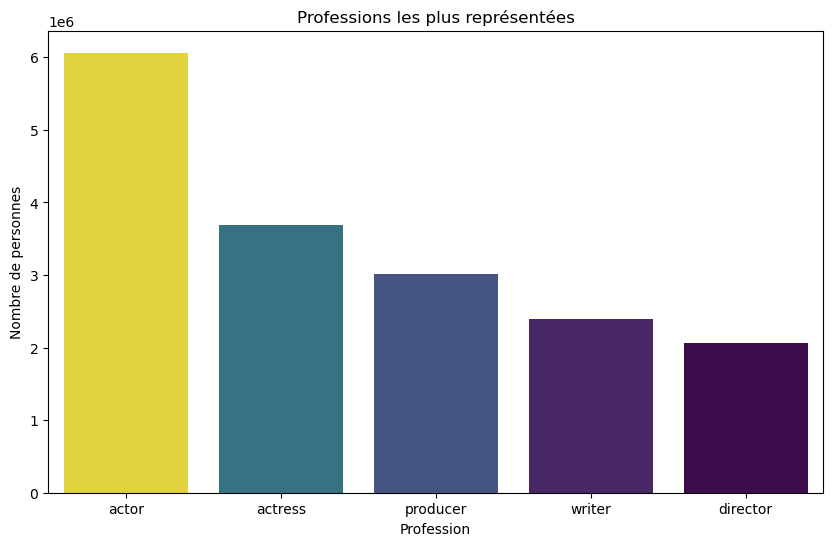

In [17]:
# 1. Graphique des professions les plus représentées
plt.figure(figsize=(10, 6))
profession_counts = df_name_basics['primaryProfession'].value_counts().head(10)
sns.barplot(x=profession_counts.index, y=profession_counts.values, hue = profession_counts.values, legend = False, palette='viridis')
plt.title("Professions les plus représentées")
plt.xlabel("Profession")
plt.ylabel("Nombre de personnes")
plt.show()

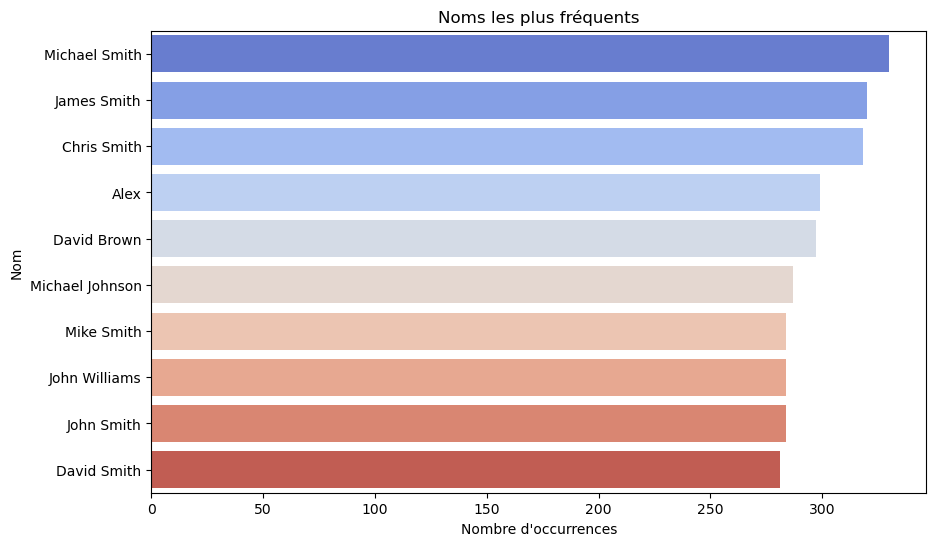

In [18]:
# 2. Analyse des noms les plus fréquents
plt.figure(figsize=(10, 6))
name_counts = df_name_basics['primaryName'].value_counts().head(10)
sns.barplot(x=name_counts.values, y=name_counts.index, hue = name_counts.index, legend = False, palette='coolwarm')
plt.title("Noms les plus fréquents")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Nom")
plt.show()

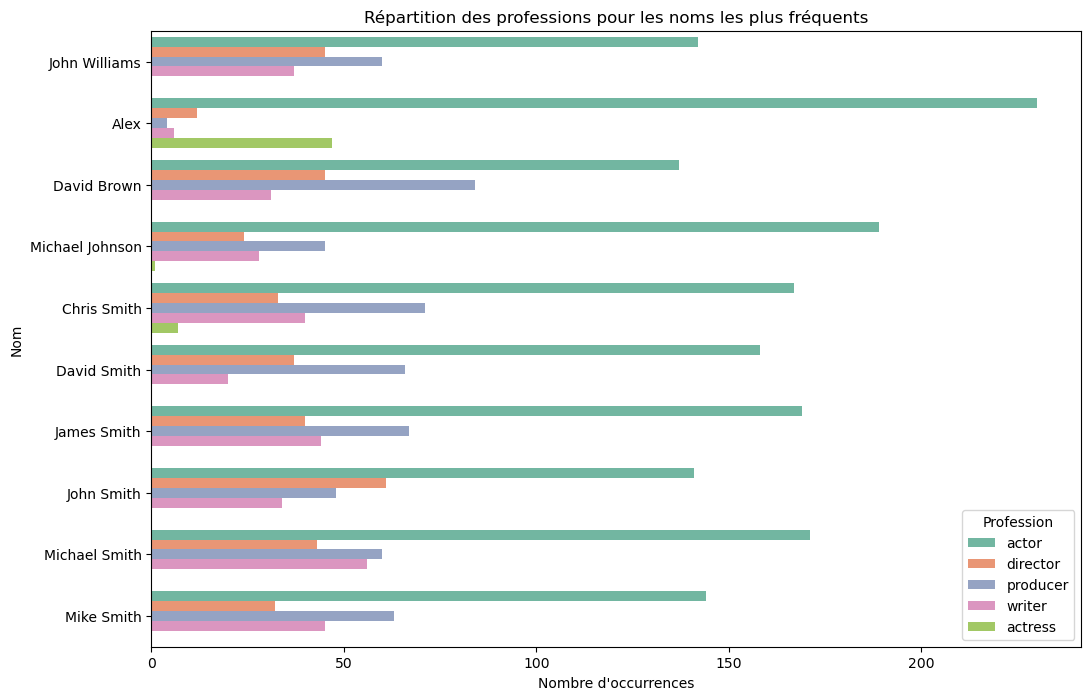

In [14]:
# 3. Répartition des professions pour les noms les plus fréquents
# Sélection des 10 noms les plus fréquents
top_names = df_name_basics['primaryName'].value_counts().head(10).index
top_names_df = df_name_basics[df_name_basics['primaryName'].isin(top_names)]

# Création d'un graphique croisé
plt.figure(figsize=(12, 8))
sns.countplot(data=top_names_df, y='primaryName', hue='primaryProfession', palette='Set2')
plt.title("Répartition des professions pour les noms les plus fréquents")
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Nom")
plt.legend(title="Profession")
plt.show()

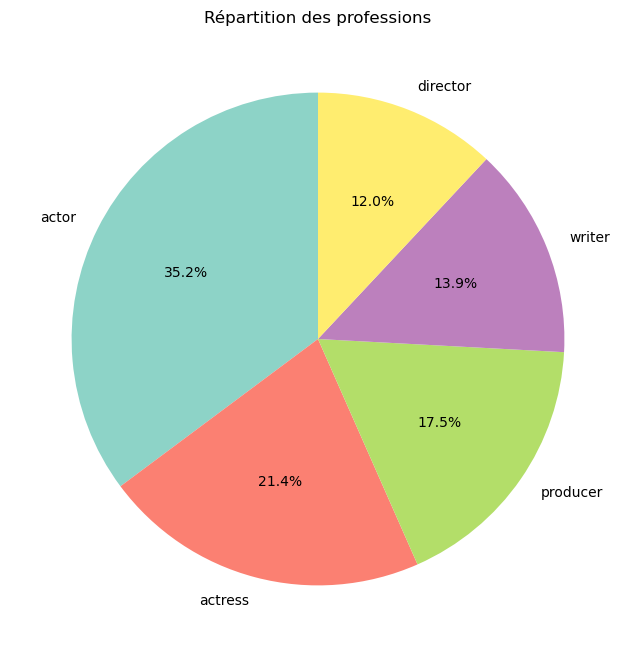

In [15]:
# 4. Proportions des professions (pie chart)
plt.figure(figsize=(8, 8))
profession_pie = df_name_basics['primaryProfession'].value_counts()
profession_pie.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title("Répartition des professions")
plt.ylabel("")
plt.show()